# 8. Data Analsys   
8-1. Data to Read   
8-2. Total Price   
8-3. Type   
8-4. District   
8-5. House Age   
8-6. Material   
8-7. Floor   
8-8. Distance

In [1]:
#載入套件
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import missingno as msno

#匯入自己寫的程式
import dataframe_format as ff
import human_read_data as hr
import plot_analysis as pa

In [2]:
df = pd.read_csv('7_noisy_data.csv')

# 8-1. Data to Read

In [3]:
df = hr.square_meter_to_ping(df)

In [4]:
# Delete an extreme value by UnitPrice_ping
print(len(df[(df['UnitPrice_ping'] > 5000000)]))
print(f'row_count: {len(df)}')
df = df[(df['UnitPrice_ping'] < 5000000)]
print(f'row_count: {len(df)}')

1
row_count: 104261
row_count: 104260


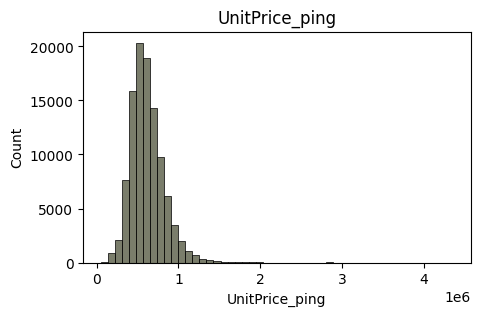

In [5]:
# 查看 UnitPrice_ping 資料分布情況
plt.figure(figsize=(5, 3))
plt.title('UnitPrice_ping')
sns.histplot(df['UnitPrice_ping'], color='#4D5139', bins=50)
plt.show()

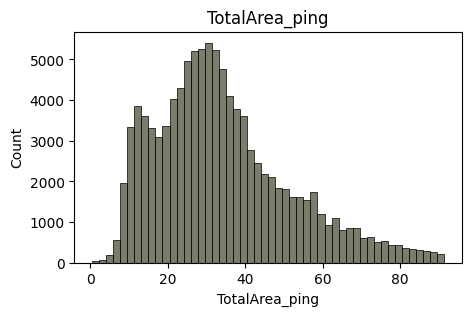

In [6]:
# 查看 'TotalArea_ping 資料分布情況
plt.figure(figsize=(5, 3))
plt.title('TotalArea_ping')
sns.histplot(df['TotalArea_ping'], color='#4D5139', bins=50)
plt.show()

In [7]:
#df = ff.reindex_noisydata(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104260 entries, 0 to 104260
Data columns (total 46 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Identifier          104260 non-null  object 
 1   Num_Land            104260 non-null  int64  
 2   Num_Building        104260 non-null  int64  
 3   Num_ParkingSpace    104260 non-null  int64  
 4   Storeys             104260 non-null  float64
 5   Floor_Arabic        104260 non-null  float64
 6   Num_Floors          104260 non-null  float64
 7   HouseAge            104260 non-null  int64  
 8   CompletionYear      104260 non-null  int64  
 9   TransactionDate_AD  104260 non-null  int64  
 10  TransactionYear     104260 non-null  int64  
 11  TransactionMonth    104260 non-null  int64  
 12  Bedrooms            104260 non-null  int64  
 13  LivingRooms         104260 non-null  int64  
 14  Bathrooms           104260 non-null  int64  
 15  TotalArea           104260 non-null  fl

In [8]:
df.head()

Identifier  Num_Land  Num_Building  Num_ParkingSpace  Storeys  \
0  RPPNMLOJPHJFFAA17CA         1             1                 0      5.0   
1  RPPSMLSJJIOFFCA28CA         3             1                 0     18.0   
2  RPSNMLTLQHNFFFA56CA         2             1                 1     14.0   
3  RPRNMLTLOHKFFAA08CA         1             1                 0      4.0   
4  RPSNMLOKOHNFFAA87CA         1             1                 1     12.0   

   Floor_Arabic  Num_Floors  HouseAge  CompletionYear  TransactionDate_AD  \
0           2.0         1.0        31            1983              201405   
1          10.0         1.0         9            2010              201910   
2          13.0         1.0        -2            2018              201601   
3           1.0         1.0        38            1977              201504   
4           6.0         1.0         0            2018              201804   

   ...  Num_Sec_School   NIMBY_Dist  Hospital_Dist   Metro_Dist  Railway_Dist  \
0  ...               1  1927.848709     986.810123   580.619237   5518.296523   
1  ...               2  5737.663362    1252.993661    30.933473   1646.111526   
2  ...               2  4111.327471     828.428002   355.217298   2511.303778   
3  ...               2  2774.267401    1075.894739   815.794335   6311.609820   
4  ...               2  2769.399126    2020.580964  1371.877712   7063.465463   

   Primary_Dist    Sec_Dist  TotalPrice  UnitPrice_ping  TotalArea_ping  
0    434.611897  232.583754    11300000    3.787809e+05       29.832551  
1    289.361797  265.468281    15930000    9.397065e+05       16.952101  
2    332.255267  141.307329    33000000    1.051884e+06       31.372276  
3    137.567134  240.123920    13000000    4.456160e+05       29.173101  
4    432.853701  376.047718    55500000    6.244336e+05       88.880553  

[5 rows x 46 columns]

In [9]:
df.to_csv('8_data_analsys.csv', encoding='utf-8-sig', index=False)

# 8-2. Total Price

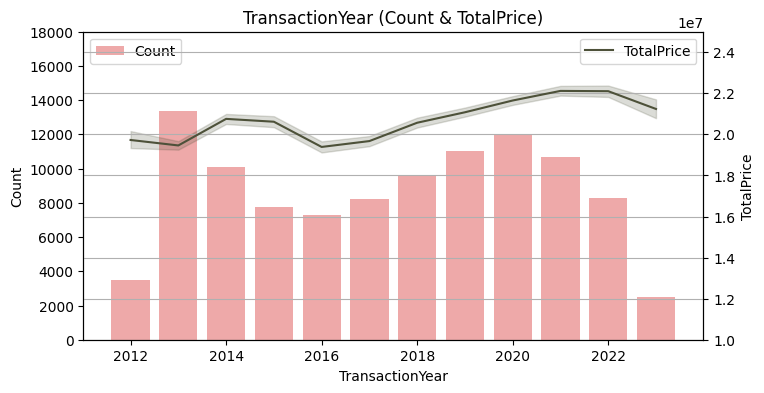

In [10]:
# Create a figure with two subplots sharing the x-axis
fig, ax1 = plt.subplots(figsize=(8, 4))

# plot a bar chart of 'Count' (ax1), set the lable and y-axis limits
year_counts = df['TransactionYear'].value_counts().sort_index()
years = year_counts.index
counts = year_counts.values
ax1.bar(years, counts, color='#EEA9A9', label='Count')
ax1.set_ylim(0, 18000)

# Create the second y-axis (ax2)
ax2 = ax1.twinx()

# Plot the line chart for 'TotalPrice' and set the label
sns.lineplot(data=df, x='TransactionYear', y='TotalPrice', markers=True, label='TotalPrice', color='#4D5139', ax=ax2)
ax2.set_ylim(10000000, 25000000)

# Set labels and title
ax1.set_xlabel('TransactionYear')
ax1.set_ylabel('Count')
ax2.set_ylabel('TotalPrice')

# Show legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.title('TransactionYear (Count & TotalPrice)')
plt.grid(True)
plt.show()

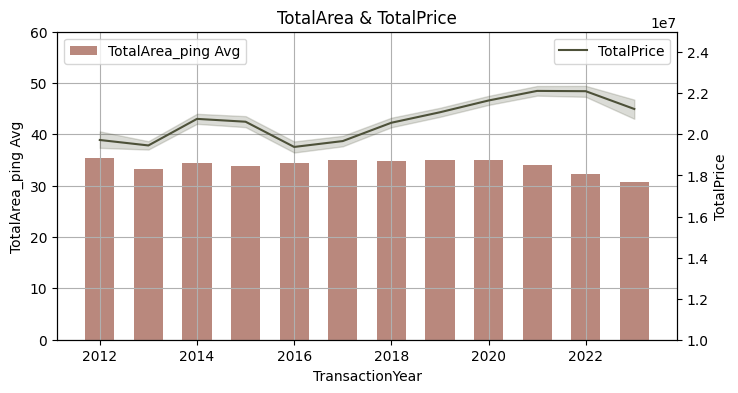

In [11]:
# Create a figure with two subplots sharing the x-axis
fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot the bar chart for 'TotalArea_ping' on the second y-axis and set the label
total_price_avg = df.groupby('TransactionYear')['TotalArea_ping'].mean()
ax1.bar(total_price_avg.index, total_price_avg.values, color='#B9887D', label='TotalArea_ping Avg', width=0.6)
ax1.set_ylim(0, 60)
plt.grid(True)

# Create the second y-axis (ax2)
ax2 = ax1.twinx()

# Plot the line chart for 'TotalPrice' on the second y-axis and set the label
sns.lineplot(data=df, x='TransactionYear', y='TotalPrice', markers=True, label='TotalPrice', color='#4D5139', ax=ax2)
ax2.set_ylim(10000000, 25000000)

# Set labels and titles
ax1.set_xlabel('TransactionYear')
ax1.set_ylabel('TotalArea_ping Avg')
ax2.set_ylabel('TotalPrice')

# Show legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.title('TotalArea & TotalPrice')
plt.show()

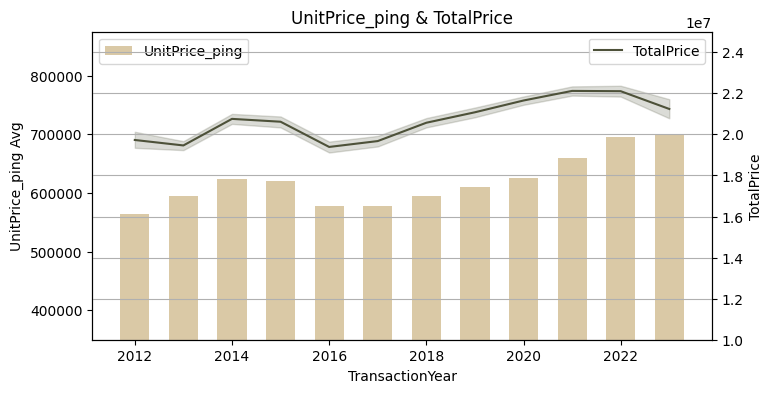

In [12]:
# Create a figure with two subplots sharing the x-axis
fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot the bar chart for 'UnitPrice_ping' on the second y-axis and set the label
total_price_avg = df.groupby('TransactionYear')['UnitPrice_ping'].mean()
ax1.bar(total_price_avg.index, total_price_avg.values, color='#DAC9A6', label='UnitPrice_ping', width=0.6)
ax1.set_ylim(350000, 875000)

# Create the second y-axis (ax2)
ax2 = ax1.twinx()

# Plot the line chart for 'TotalPrice' on the second y-axis and set the label
sns.lineplot(data=df, x='TransactionYear', y='TotalPrice', markers=True, label='TotalPrice', color='#4D5139', ax=ax2)
ax2.set_ylim(10000000, 25000000)

# Set labels and titles
ax1.set_xlabel('TransactionYear')
ax1.set_ylabel('UnitPrice_ping Avg')
ax2.set_ylabel('TotalPrice')

# Show legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.title('UnitPrice_ping & TotalPrice')
plt.grid(True)
plt.show()

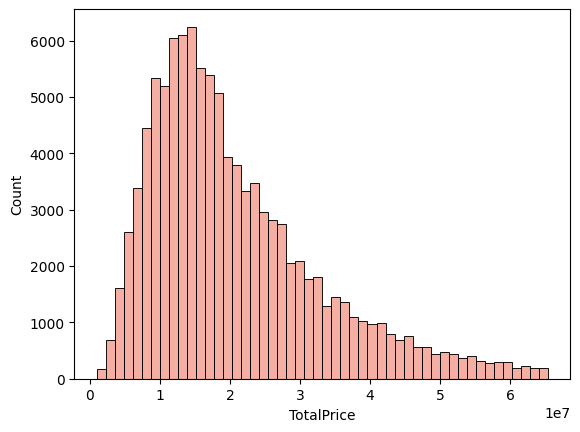

In [13]:
figsize=(8, 4)
sns.histplot(df['TotalPrice'], color='#F19483', bins=50)
plt.show()

Text(0.5, 1.0, 'Total Price')

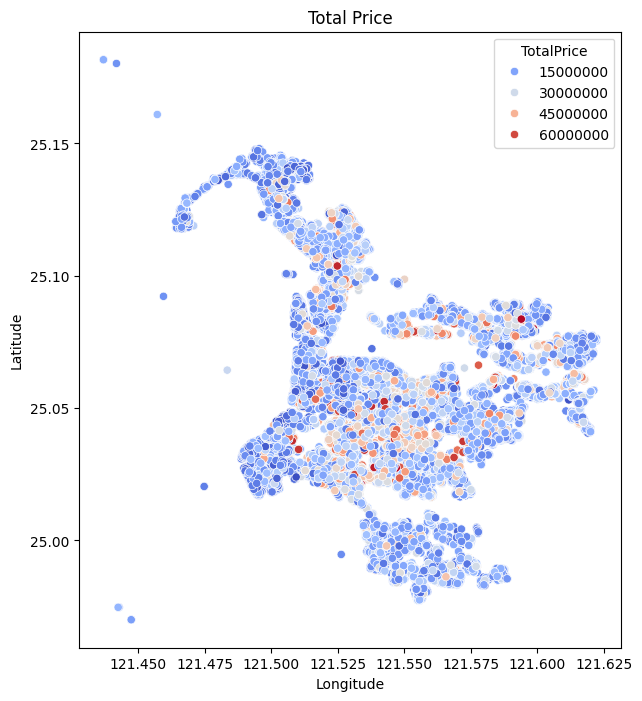

In [14]:
# Total Price Distribution Map
plt.figure(figsize=(7,8))
sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='TotalPrice', palette='coolwarm')
plt.title('Total Price')

# TotalArea/ LandArea

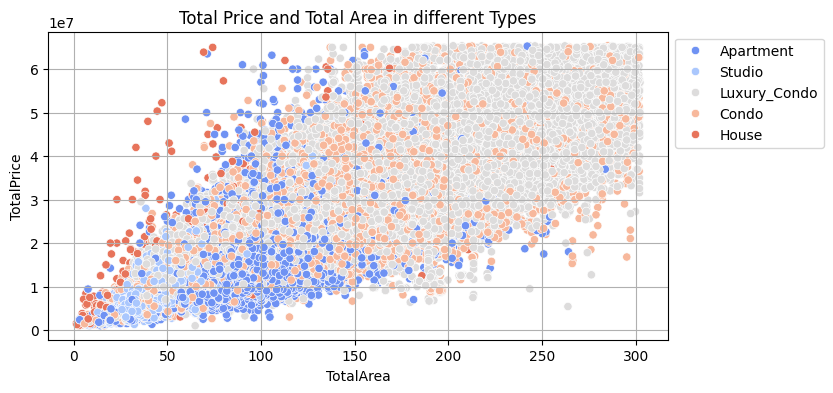

In [15]:
# Total Price and Total Area in different Types
plt.figure(figsize=(8, 4))
#sns.lineplot(data=df, x='HouseAge', y='TotalPrice', hue='Type', markers=True)
sns.scatterplot(x='TotalArea', y='TotalPrice', data=df, hue='Type', palette='coolwarm')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Total Price and Total Area in different Types')
plt.grid(True)
plt.show()

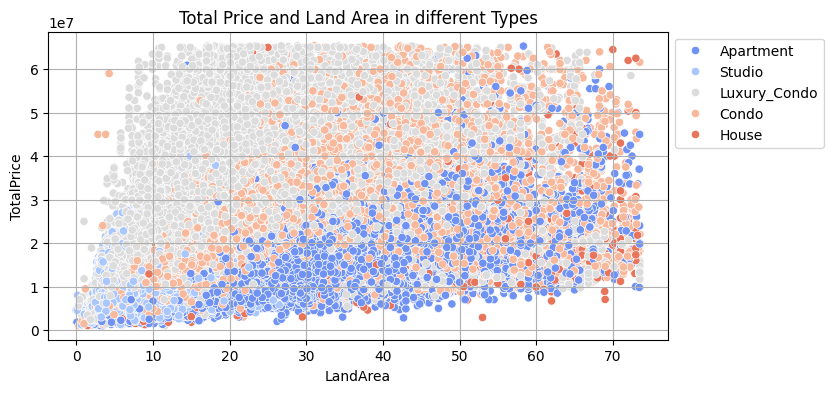

In [16]:
# Total Price and Total Area in different Types
plt.figure(figsize=(8, 4))
#sns.lineplot(data=df, x='HouseAge', y='TotalPrice', hue='Type', markers=True)
sns.scatterplot(x='LandArea', y='TotalPrice', data=df, hue='Type', palette='coolwarm')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Total Price and Land Area in different Types')
plt.grid(True)
plt.show()

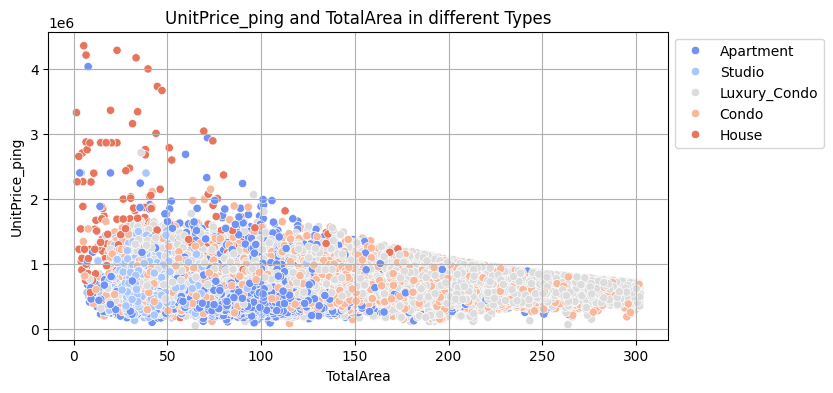

In [17]:
# UnitPrice_ping and Total Area in different Types
plt.figure(figsize=(8, 4))
sns.scatterplot(x='TotalArea', y='UnitPrice_ping', data=df, hue='Type', palette='coolwarm')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('UnitPrice_ping and TotalArea in different Types')
plt.grid(True)
plt.show()

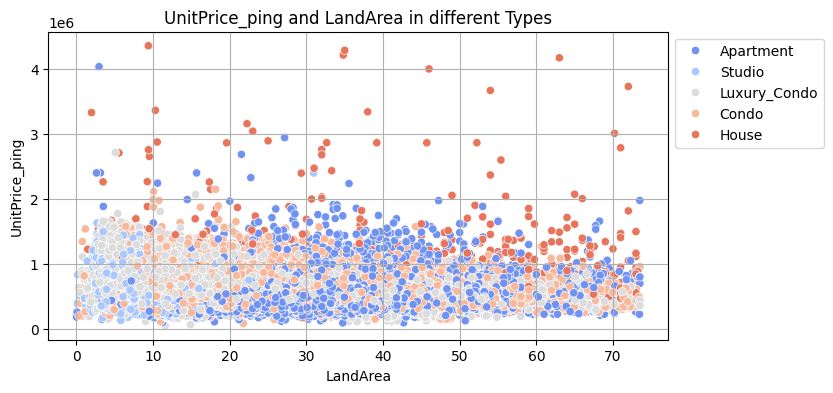

In [18]:
# UnitPrice_ping and Land Area in different Types
plt.figure(figsize=(8, 4))
sns.scatterplot(x='LandArea', y='UnitPrice_ping', data=df, hue='Type', palette='coolwarm')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('UnitPrice_ping and LandArea in different Types')
plt.grid(True)
plt.show()

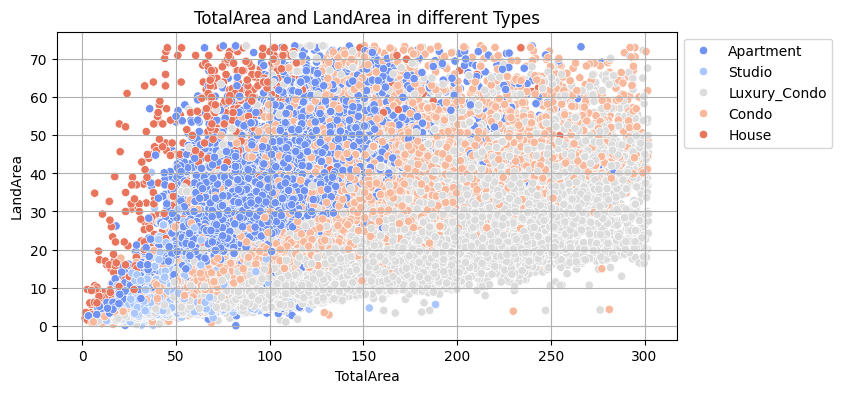

In [19]:
# TotalArea and LandArea in different Types
plt.figure(figsize=(8, 4))
sns.scatterplot(x='TotalArea', y='LandArea', data=df, hue='Type', palette='coolwarm')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('TotalArea and LandArea in different Types')
plt.grid(True)
plt.show()

# 8-3 Type

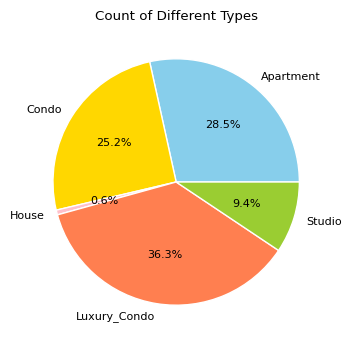

In [20]:
data_dict = {}
group = df.groupby('Type')
for name, datas in group:
    data_dict[name] = len(datas)

data_values = list(data_dict.values())
labels_values = list(data_dict.keys())

colors = {'Studio': 'yellowgreen', 'Apartment': 'skyblue', 'Condo': 'gold', 'Luxury_Condo': 'coral', 'House': 'pink'}

# Define pie chart
fig = plt.figure(figsize=(6, 4))
plt.rcParams['font.size'] = 8

# Pie chart for total values
plt.pie(data_values, labels=labels_values, autopct='%1.1f%%', radius=1, 
        colors=[colors[label] for label in labels_values], wedgeprops={"linewidth": 1, "edgecolor": "white"})
plt.title('Count of Different Types')
plt.show()

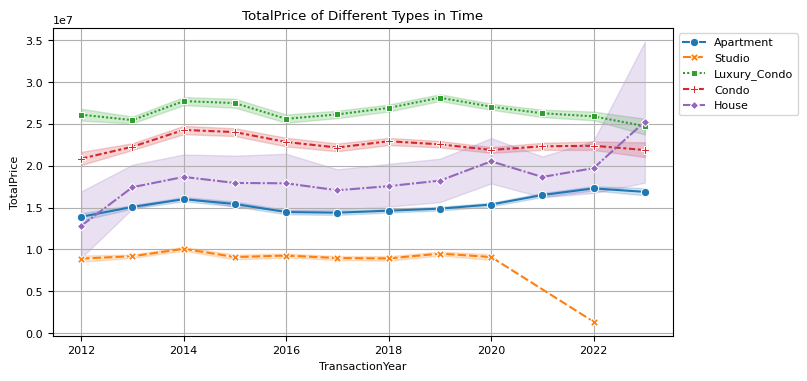

In [21]:
# UnitPrice_ping of Different Types in Time (line plot)
plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x='TransactionYear', y='TotalPrice', hue='Type', style='Type', markers=True)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('TotalPrice of Different Types in Time')
plt.grid(True)
plt.show()

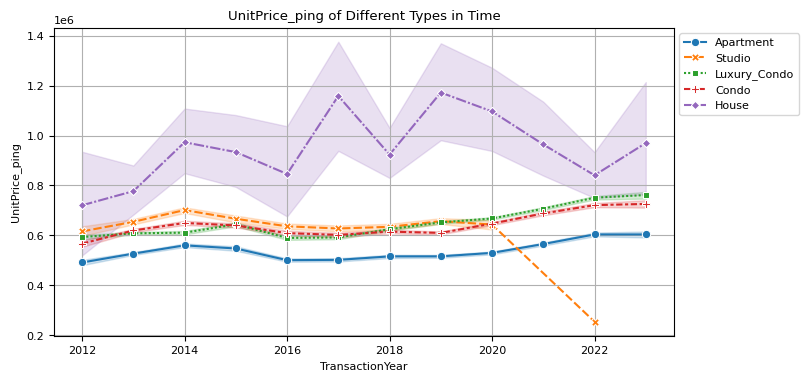

In [22]:
# UnitPrice_ping of Different Types in Time (line plot)
plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x='TransactionYear', y='UnitPrice_ping', hue='Type', style='Type', markers=True)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('UnitPrice_ping of Different Types in Time')
plt.grid(True)
plt.show()

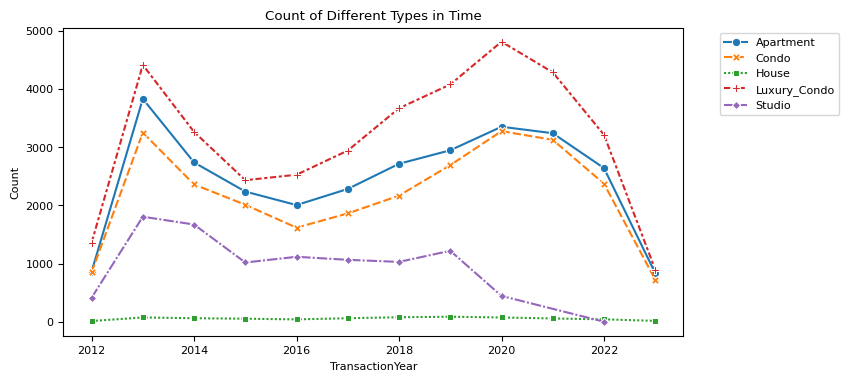

In [23]:
# Count of Different Types in Time
plt.figure(figsize=(8, 4))
data = df.groupby(['TransactionYear', 'Type']).size().reset_index(name='Count')
sns.lineplot(data=data, x='TransactionYear', y='Count', hue='Type', style='Type', markers=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Count of Different Types in Time')
plt.show()

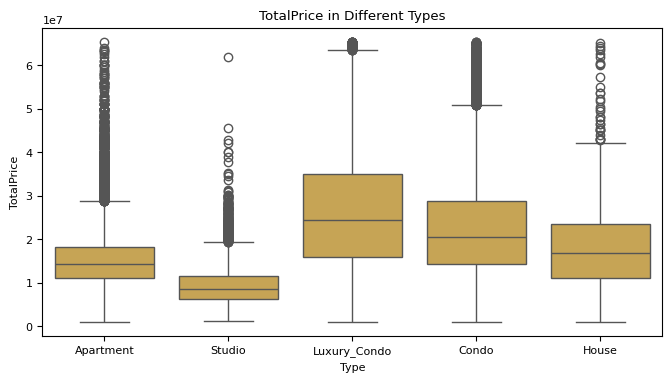

In [24]:
# TatolPrice of Different Types (box plot)
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Type', y='TotalPrice', color='#D9AB42')
plt.title('TotalPrice in Different Types')
plt.show()

# 8-4. District

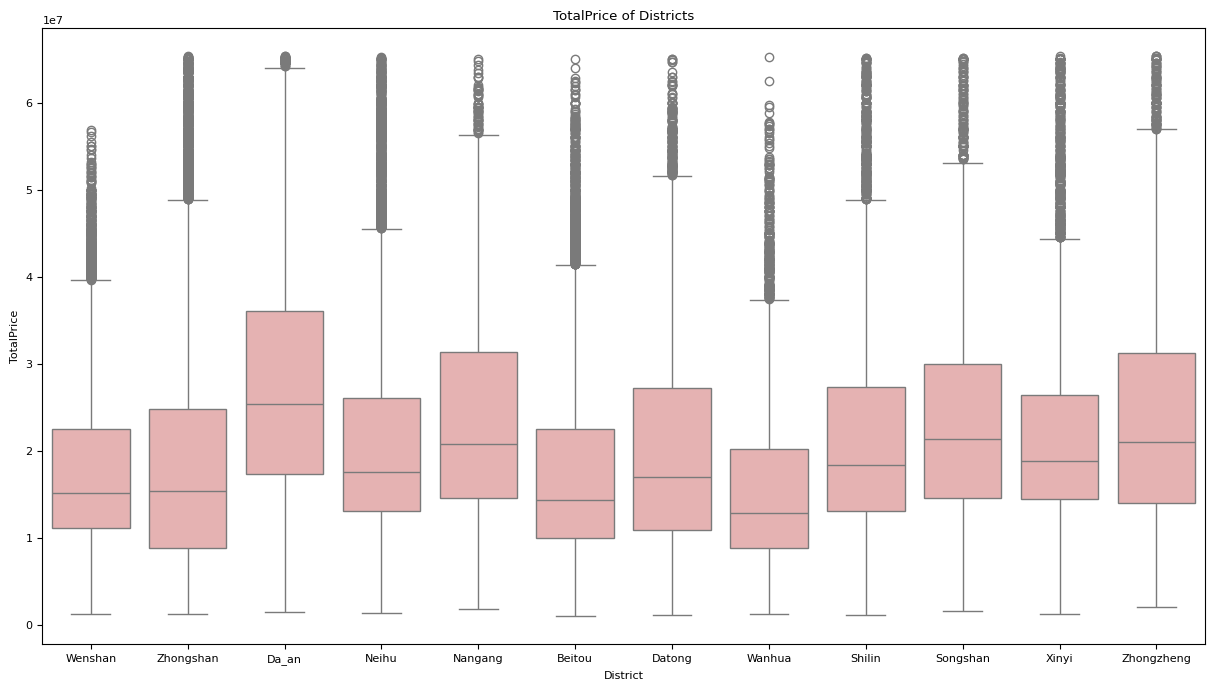

In [25]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='District', y='TotalPrice', color='#EEA9A9')
plt.title('TotalPrice of Districts')
plt.show()

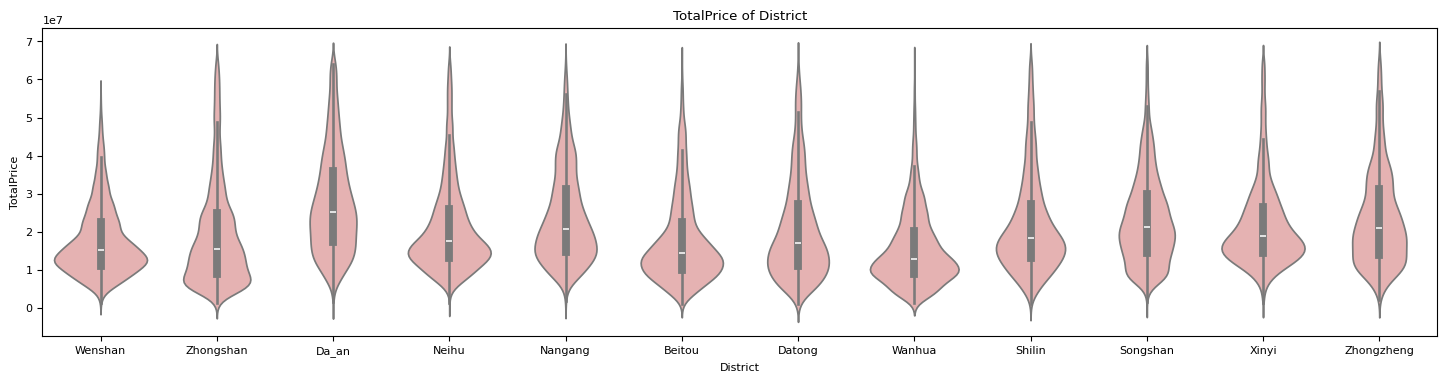

In [26]:
plt.figure(figsize=(18,4))
sns.violinplot(data=df,x='District',y='TotalPrice', color='#EEA9A9')
plt.title('TotalPrice of District')
plt.show()

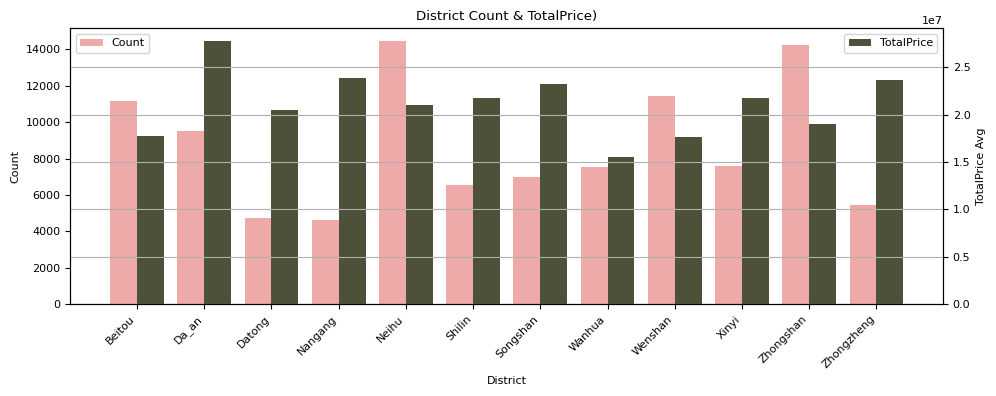

In [27]:
# Create a figure with two subplots sharing the x-axis
fig, ax1 = plt.subplots(figsize=(10, 4))

# Draw the bar chart for 'Count' on the first y-axis (ax1) and set the label
dist_counts = df['District'].value_counts().sort_index()
dist = dist_counts.index
counts = dist_counts.values
bar_width = 0.4

ax1.bar(dist, counts, color='#EEA9A9', label='Count', width=bar_width)

# Calculate x-coordinates for the second y-axis (ax2) to slightly offset the bars
dist_shifted = np.arange(len(dist))

# Create the second y-axis (ax2)
ax2 = ax1.twinx()

# Draw the bar chart for 'TotalPrice Avg' on the second y-axis and set the label
total_price_avg = df.groupby('District')['TotalPrice'].mean()
ax2.bar(dist_shifted + bar_width, total_price_avg, color='#4D5139', label='TotalPrice', width=bar_width)

# Set labels and titles
ax1.set_xlabel('District')
ax1.set_ylabel('Count')
ax2.set_ylabel('TotalPrice Avg')

# Set x-axis ticks and labels
combined_shifted = dist_shifted + bar_width / 2
ax1.set_xticks(combined_shifted)
ax1.set_xticklabels(dist, rotation=45, ha="right")

# Show legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.title('District Count & TotalPrice)')
plt.tight_layout()
plt.grid(True)
plt.show()

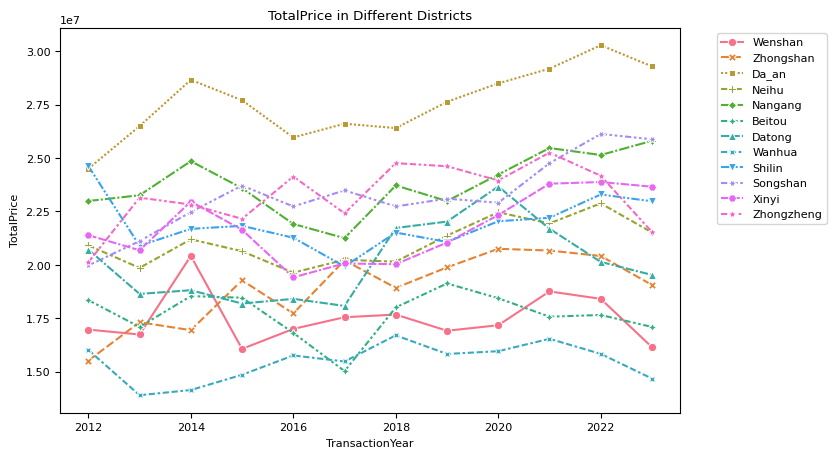

In [28]:
# District 各年的 TotalPrice (line plot)
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='TransactionYear', y='TotalPrice', hue='District', errorbar=None, style='District', markers=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('TotalPrice in Different Districts')
plt.show()

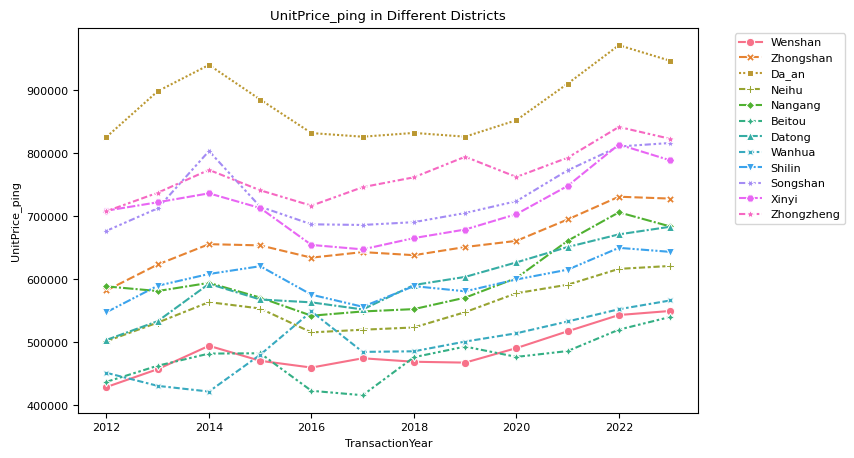

In [29]:
# District 各年的 UnitPrice_ping (line plot)
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='TransactionYear', y='UnitPrice_ping', hue='District', errorbar=None, style='District', markers=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('UnitPrice_ping in Different Districts')
plt.show()

# 8-5. House Age

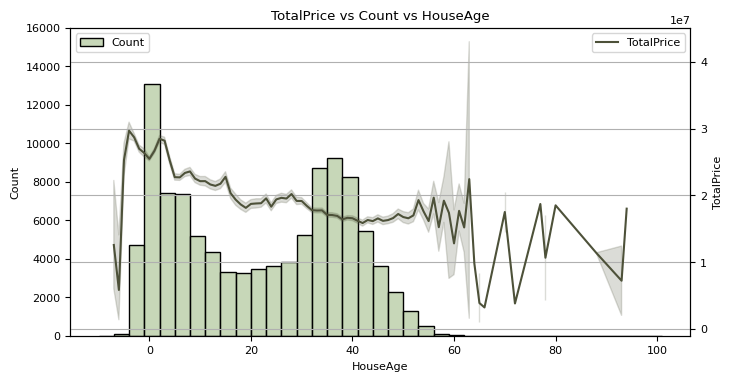

In [30]:
# Create a figure with two subplots sharing the x-axis
fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot the bar chart for 'Count' on the second y-axis and set the label
sns.histplot(df['HouseAge'], color='#B5CAA0', bins=range(-10, 103, 3), ax=ax1, label='Count')
ax1.set_ylim(0, 16000)

# Create the second y-axis (ax2)
ax2 = ax1.twinx()

# Plot the line chart for 'TotalPrice' on the second y-axis and set the label
sns.lineplot(data=df, x='HouseAge', y='TotalPrice', markers=True, label='TotalPrice', color='#4D5139', ax=ax2)

# Set labels and titles
ax1.set_xlabel('HouseAge')
ax1.set_ylabel('Count')
ax2.set_ylabel('TotalPrice')

# Show legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.title('TotalPrice vs Count vs HouseAge')
plt.grid(True)
plt.show()

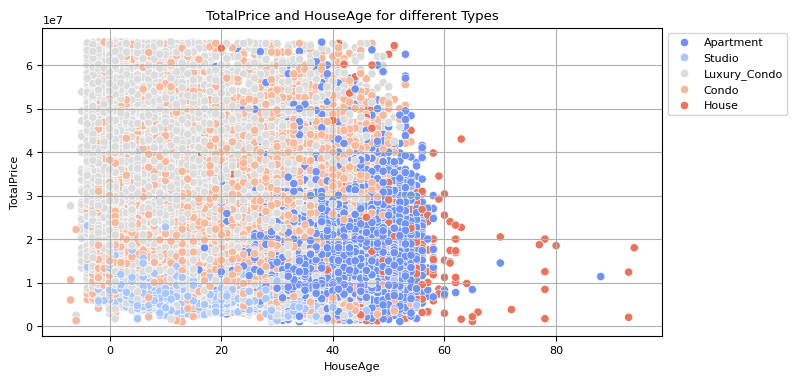

In [31]:
# Scatter plot for House Age and Total Price in different Types
plt.figure(figsize=(8, 4))
#sns.lineplot(data=df, x='HouseAge', y='TotalPrice', hue='Type', markers=True)
sns.scatterplot(x='HouseAge', y='TotalPrice', data=df, hue='Type', palette='coolwarm')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('TotalPrice and HouseAge for different Types')
plt.grid(True)
plt.show()

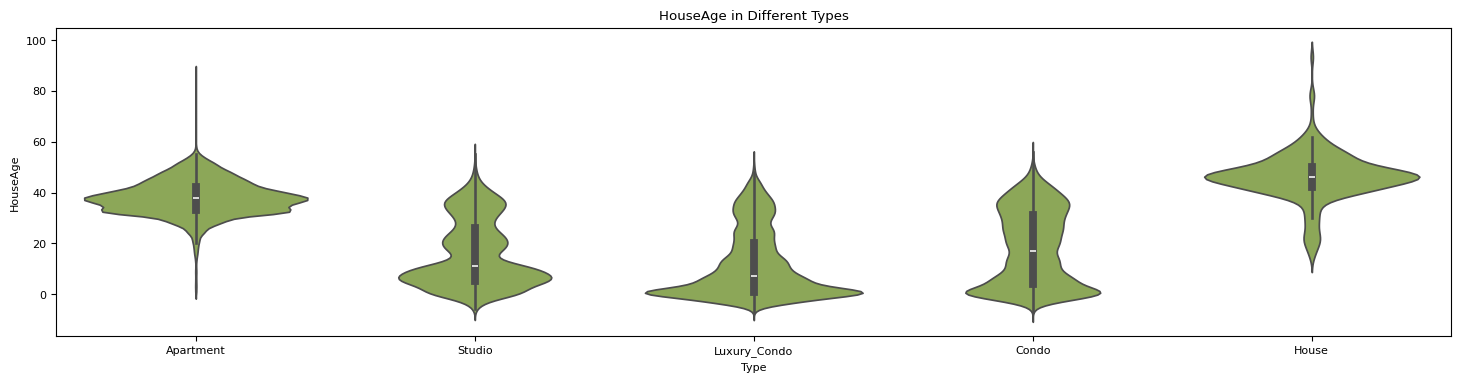

In [32]:
# HouseAge in Different Types
plt.figure(figsize=(18,4))
sns.violinplot(data=df,x='Type',y='HouseAge', color='#90B44B')
plt.title('HouseAge in Different Types')
plt.show()

<Axes: title={'center': 'Completion Year'}, xlabel='Longitude', ylabel='Latitude'>

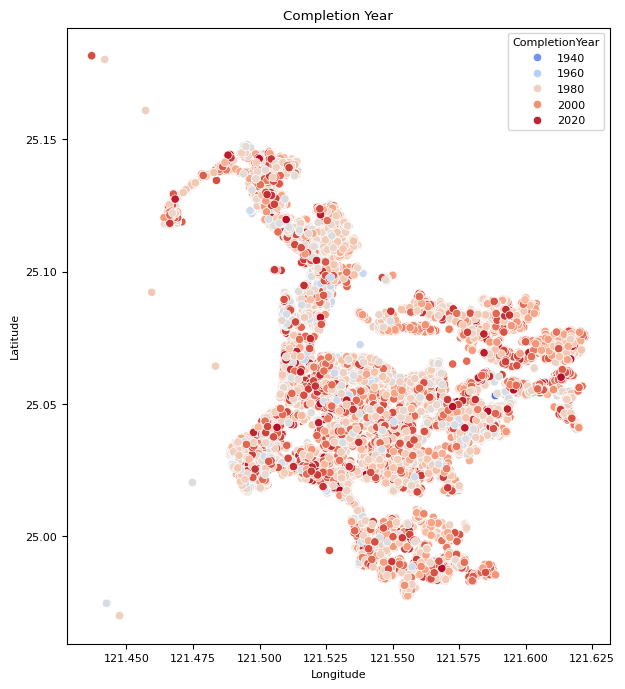

In [33]:
# Completion Year Distribution Map
plt.figure(figsize=(7,8))
plt.title('Completion Year')
sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='CompletionYear', palette='coolwarm')

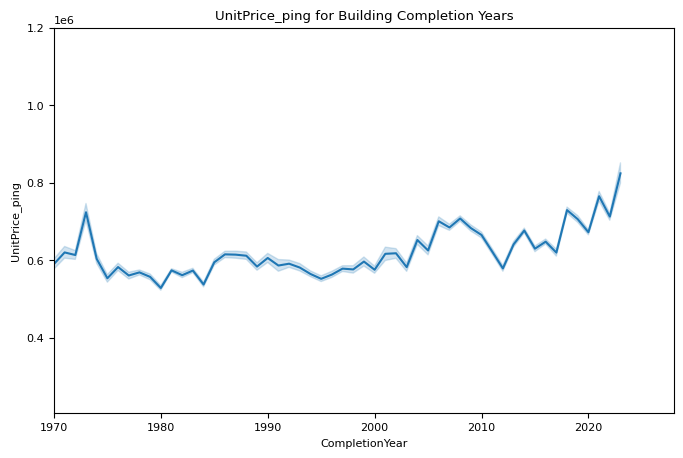

In [34]:
# District 各年的 UnitPrice_ping (line plot)
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='CompletionYear', y='UnitPrice_ping', markers=True)
plt.title('UnitPrice_ping for Building Completion Years')

plt.xlim(1970, None)
plt.ylim(None, 1200000)
plt.show()

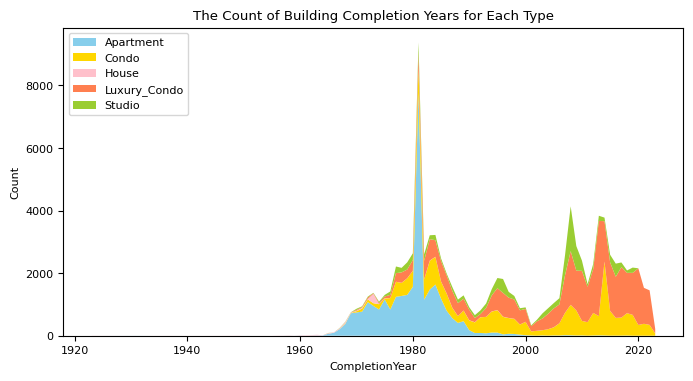

In [35]:
# CompletionYear Distrubution in different Types
data = df.groupby(['CompletionYear', 'Type']).size().reset_index(name='Count')
# Creat 'pivot_table'
pivot_data = data.pivot_table(index='CompletionYear', columns='Type', values='Count', fill_value=0)

# define the colors
colors = {'Studio': 'yellowgreen', 'Apartment': 'skyblue', 'Condo': 'gold', 'Luxury_Condo': 'coral', 'House': 'pink'}

# Creat a stack plot
plt.figure(figsize=(8, 4))
plt.stackplot(pivot_data.index, pivot_data.values.T, labels=pivot_data.columns, colors=[colors[type] for type in pivot_data.columns.to_list()])
plt.legend(loc='upper left')
plt.title('The Count of Building Completion Years for Each Type')
plt.xlabel('CompletionYear')
plt.ylabel('Count')
plt.show()

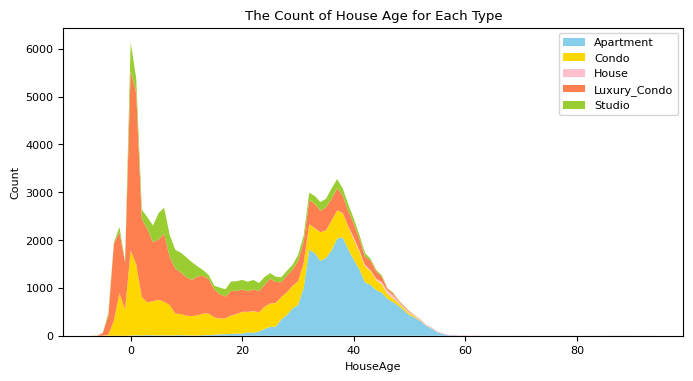

In [36]:
# CompletionYear Distrubution in different Types
data = df.groupby(['HouseAge', 'Type']).size().reset_index(name='Count')
# Creat 'pivot_table'
pivot_data = data.pivot_table(index='HouseAge', columns='Type', values='Count', fill_value=0)

# define the colors
colors = {'Studio': 'yellowgreen', 'Apartment': 'skyblue', 'Condo': 'gold', 'Luxury_Condo': 'coral', 'House': 'pink'}

# Creat a stack plot
plt.figure(figsize=(8, 4))
plt.stackplot(pivot_data.index, pivot_data.values.T, labels=pivot_data.columns, colors=[colors[type] for type in pivot_data.columns.to_list()])
plt.legend(loc='upper right')
plt.title('The Count of House Age for Each Type')
plt.xlabel('HouseAge')
plt.ylabel('Count')
plt.show()

# 8-6. Material

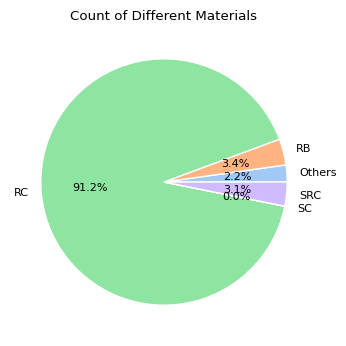

In [37]:
data_dict = {}
group = df.groupby('Material')
for name, datas in group:
    data_dict[name] = len(datas)

data_values = list(data_dict.values())
labels_values = list(data_dict.keys())

colors = sns.color_palette('pastel')
# Define pie chart
fig = plt.figure(figsize=(6, 4))
plt.rcParams['font.size'] = 8

# Pie chart for total values
plt.pie(data_values, labels=labels_values, autopct='%1.1f%%', radius=1, 
        colors=colors, wedgeprops={"linewidth": 1, "edgecolor": "white"})
plt.title('Count of Different Materials')
plt.show()

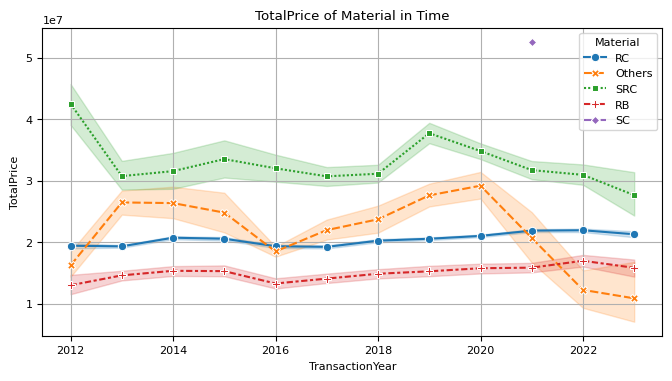

In [38]:
# TotalPrice of Material in Time
plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x='TransactionYear', y='TotalPrice', hue='Material', style='Material', markers=True)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('TotalPrice of Material in Time')
plt.grid(True)
plt.show()

# 8-7. Floor

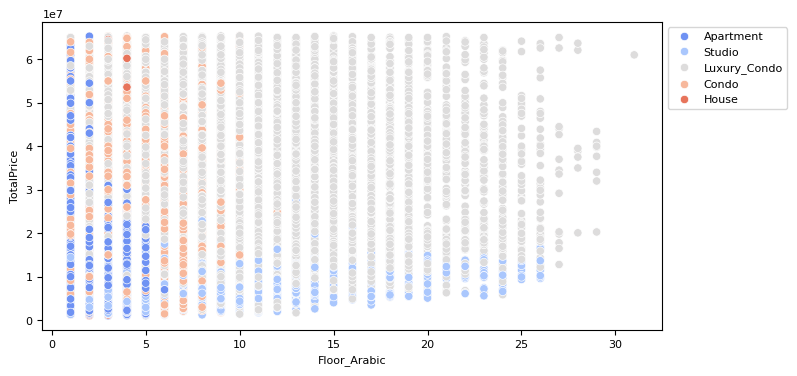

In [39]:
# Scatter plot for Floor and Total Price in different Types
plt.figure(figsize=(8,4))
sns.scatterplot(x='Floor_Arabic', y='TotalPrice', data=df, hue='Type', palette='coolwarm')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

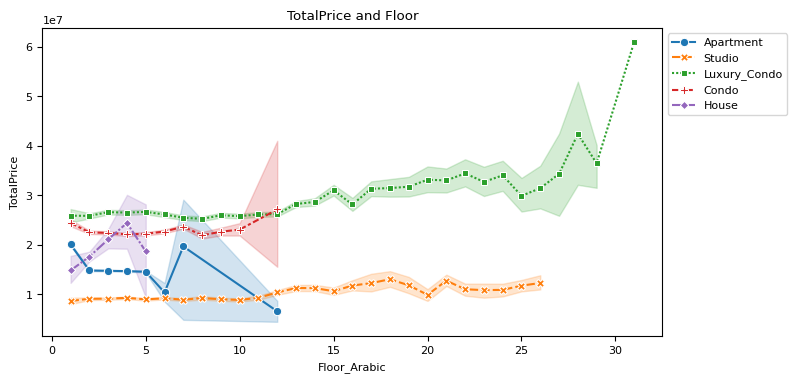

In [40]:
# Line plot for Floor and Total Price in different Types
plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x='Floor_Arabic', y='TotalPrice', hue='Type', style='Type', markers=True)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('TotalPrice and Floor')
plt.show()

# 8-8. Distance

<Axes: title={'center': 'Distance to Secondary School'}, xlabel='Longitude', ylabel='Latitude'>

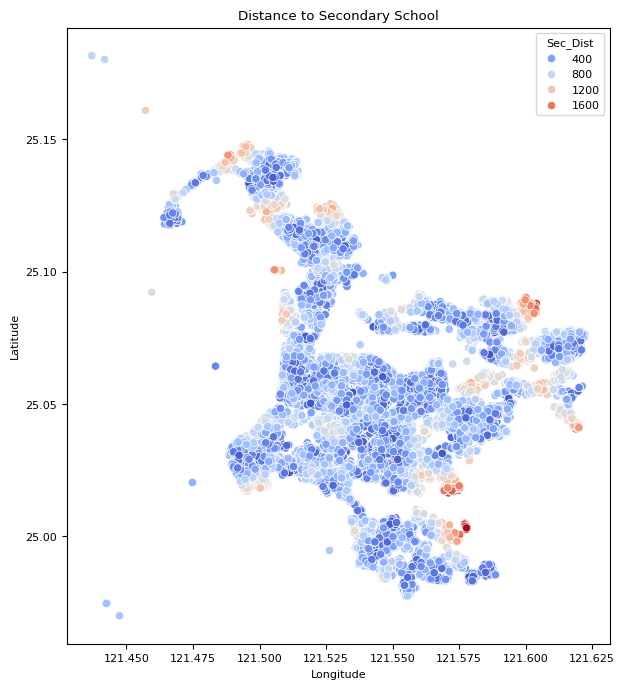

In [41]:
# Distance to Secondary School
plt.figure(figsize=(7,8))
plt.title('Distance to Secondary School')
sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='Sec_Dist', palette='coolwarm')

<Axes: title={'center': 'Distance to Metro station'}, xlabel='Longitude', ylabel='Latitude'>

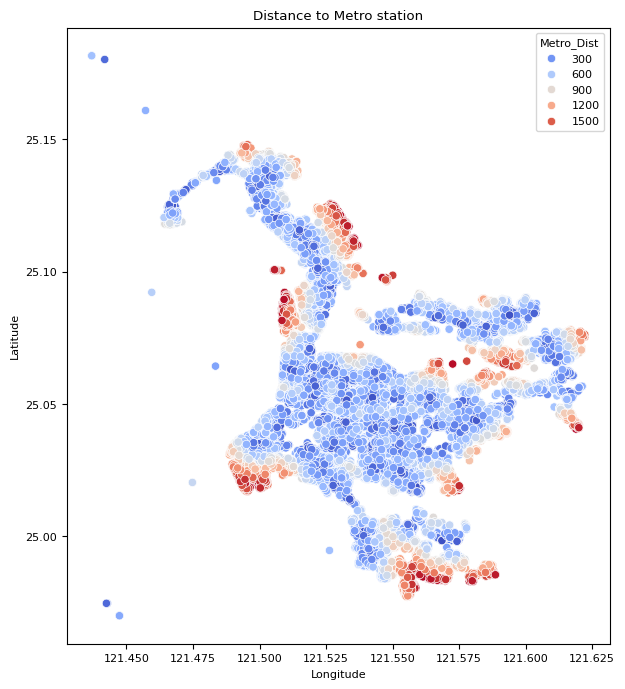

In [42]:
# Distance to Metro station
plt.figure(figsize=(7,8))
plt.title('Distance to Metro station')
sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='Metro_Dist', palette='coolwarm')